In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../datasets/alldata_1_for_kaggle.csv', encoding="latin-1")
df.head(3)

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...


In [2]:
df = df.drop('Unnamed: 0', axis = 1)
df = df.rename({'0': 'target', 'a': 'feature'}, axis = 1)
df.head(3)

,target,feature
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...


In [3]:
df['feature'][0]

"Thyroid surgery in  children in a single institution from Osama Ibrahim Almosallama Ali Aseerib Ahmed Alhumaida Ali S AlZahranic Saif Alsobhib Saud AlShanafeybFrom the  aDepartment of Surgery College of Medicine Qassim University Buraidah Al Qassim Saudi Arabia  bDepartment of Surgery King Faisal Specialist Hospital and Research Center Riyadh Saudi Arabia cDepartment of Medicine King Faisal Specialist Hospital and Research Center Riyadh Saudi Arabia Correspondence   Dr  Osama Ibrahim  Almosallam  Department of  Surgery  College  of  Medicine Qassim  University  PO  Box   Buraidah  Al  Qassim   Saudi  Arabia  osama_iaahotmailcom ORCID orcid0000000290367564        Citation  Almosallam OI Aseeri A Alhumaid A AlZahrani AS Alsobhi S AlShanafey S Thyroid surgery in  children  in  a  single  institution  from   Ann  Saudi  Med         Received January  Accepted May  Published August  Copyright Copyright   Annals of Saudi Medicine Saudi Arabia This is an   access  under the Creative Commons A

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,2), max_features=7500, smooth_idf=True, sublinear_tf=True)
vectorizer.fit(df['feature'])
df_features = vectorizer.transform(df['feature'])
df_target = df['target']

df_features_train, df_features_test, df_target_train, df_target_test = train_test_split(df_features.toarray(), df_target, test_size = 0.2, random_state=42)

In [10]:
from sklearn.dummy import DummyClassifier

dummy_model = DummyClassifier(strategy = "uniform")
dummy_model.fit(df_features_train, df_target_train)
target_prediction = dummy_model.predict(df_features_test)

In [11]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(df_target_test, target_prediction))

                precision    recall  f1-score   support

  Colon_Cancer       0.32      0.31      0.32       517
   Lung_Cancer       0.28      0.37      0.32       407
Thyroid_Cancer       0.40      0.32      0.36       590

      accuracy                           0.33      1514
     macro avg       0.33      0.33      0.33      1514
  weighted avg       0.34      0.33      0.33      1514



In [7]:
accuracy_score = accuracy_score(df_target_test, target_prediction)

In [8]:
accuracy_score

0.38969616908850724

array([[  0,   0, 517],
       [  0,   0, 407],
       [  0,   0, 590]])

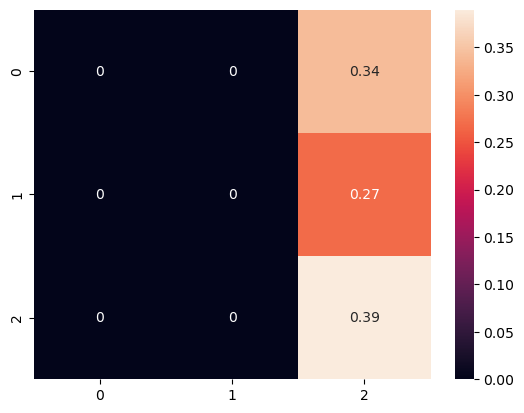

In [9]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(df_target_test, target_prediction)
sns.heatmap(cf_matrix / np.sum(cf_matrix), annot = True)
cf_matrix